# Solución Laboratorio Aprendizaje No Supervizado

## Integrantes:
- Marco Josué Fura Mendoza
- Marcos Esteban Reiman Durán

In [267]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import pairwise_distances,silhouette_score
import numpy as np
from sklearn_extra.cluster import KMedoids

In [268]:
dataset = sm.datasets.get_rdataset("USArrests", "datasets")

In [269]:
df_usa_arrests=dataset.data

### 1.Realice una pequeña descripción estadística de las variables. ¿se justifica o no una estandarizacion de las variables cuantitativas?.

## Anáslisis Descriptivo

In [270]:
df_usa_arrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [271]:
df_usa_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [272]:

df_usa_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [273]:
df_usa_arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [274]:
df_usa_arrests.shape

(50, 4)

In [275]:
df_usa_arrests.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [276]:
df_usa_arrests.duplicated().sum()

0

In [277]:
df_usa_arrests.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


Análisis Multivariado

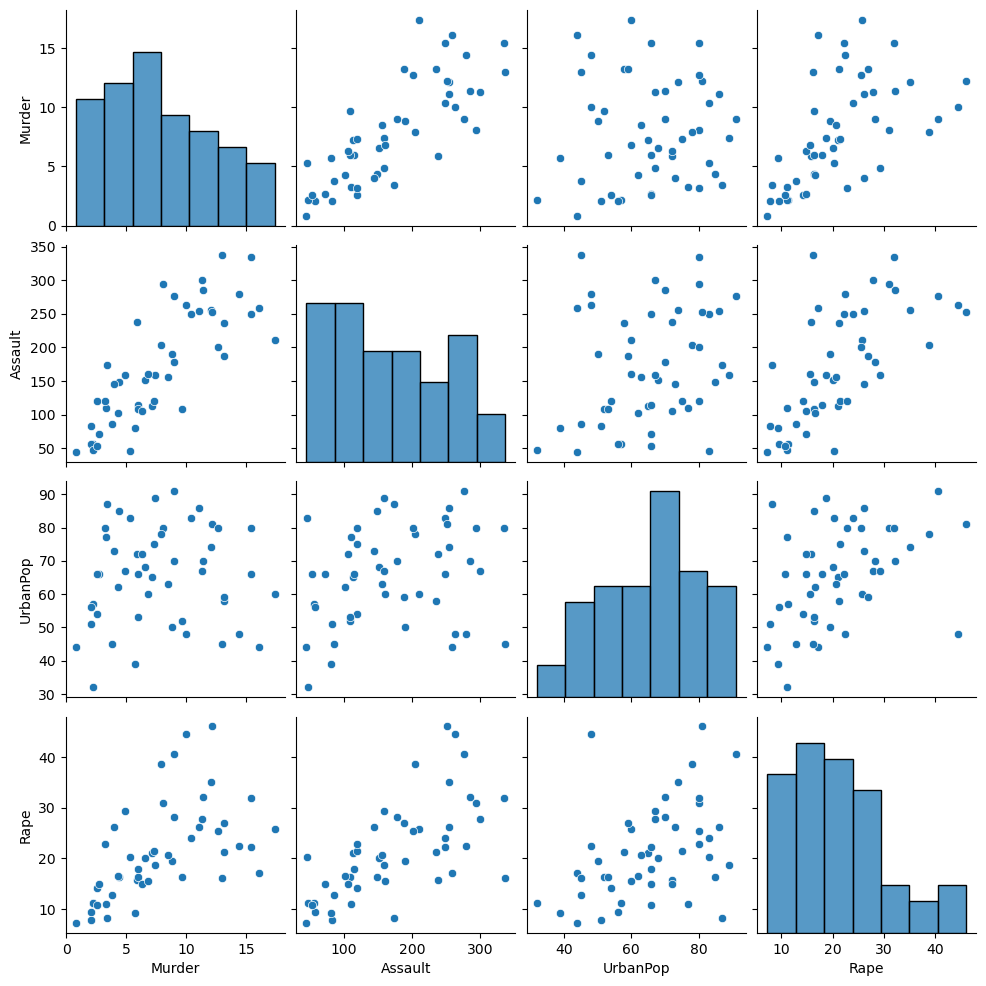

In [278]:
sns.pairplot(df_usa_arrests)
plt.show()

<Axes: >

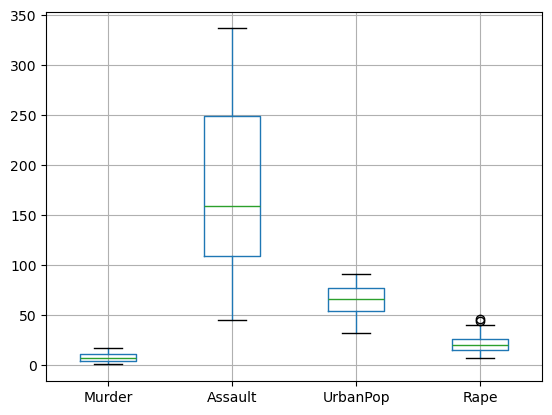

In [279]:
df_usa_arrests.boxplot()

Ahora escalamos los datos

In [280]:

df_usa_arrests_scaled=pd.DataFrame(scale(df_usa_arrests),columns=df_usa_arrests.columns)

<Axes: >

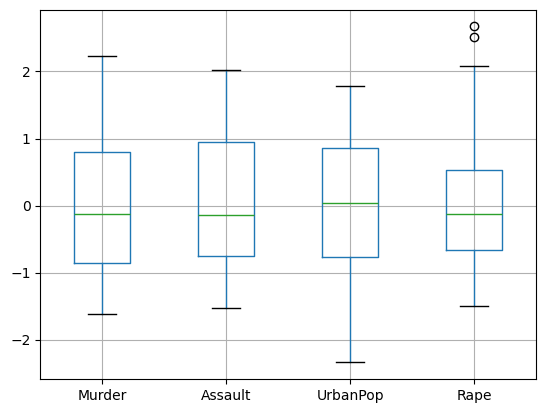

In [281]:
df_usa_arrests_scaled.boxplot()

Coeficiente de Variación (CV)
El Coeficiente de Variación (CV) se calcula como la relación entre la desviación estándar y la media de cada variable. Si el CV es mayor a 0.5, se recomienda estandarizar la variable para garantizar que cada una tenga una varianza similar, mejorando así la calidad del modelo estadístico.

In [282]:
# Descripción estadística
desc_stats = df_usa_arrests.describe()
print(desc_stats)

# Análisis de la necesidad de estandarización
# Coeficiente de variación (CV) para cada variable
cv = df_usa_arrests.std() / df_usa_arrests.mean()
print("\nCoeficiente de Variación (CV):")
print(cv)

# Justificación de la estandarización
# Se considera estandarizar si el CV es mayor a 0.5
estandarizar = cv > 0.5
print("\n¿Se justifica la estandarización?:")
print(estandarizar)

         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

Coeficiente de Variación (CV):
Murder      0.559259
Assault     0.488040
UrbanPop    0.220854
Rape        0.441145
dtype: float64

¿Se justifica la estandarización?:
Murder       True
Assault     False
UrbanPop    False
Rape        False
dtype: bool


### 2.A. Agrupar los observaciones mediante enlace simple, completo y ward, junto con las métricas Euclidiana y Manhattan. Visualice los agrupamiento mediante sus respectivos dendrograma.

Enlace simple con distancia Euclidiana

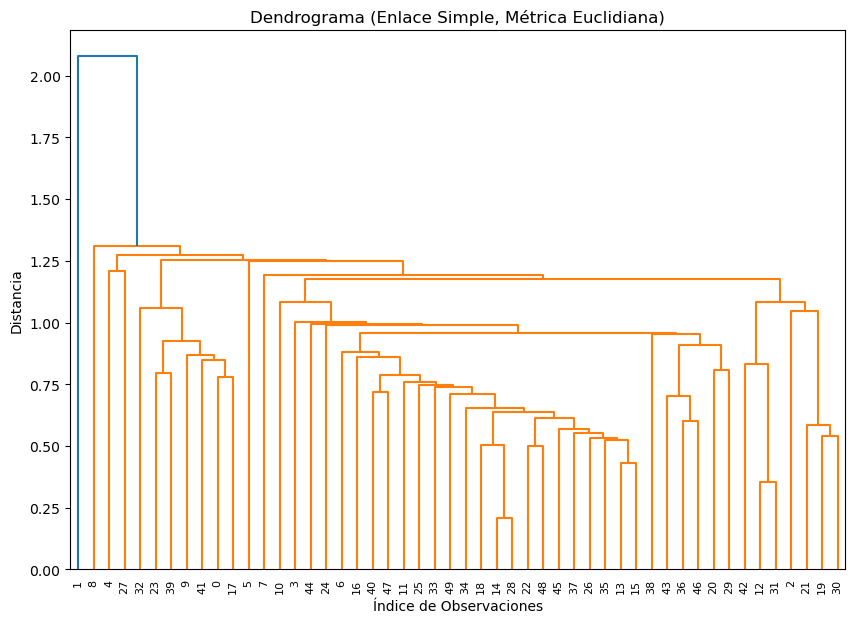

In [283]:
linkage_matrix = linkage(df_usa_arrests_scaled, method='single', metric='euclidean')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Simple, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace simple con distancia Manhattan

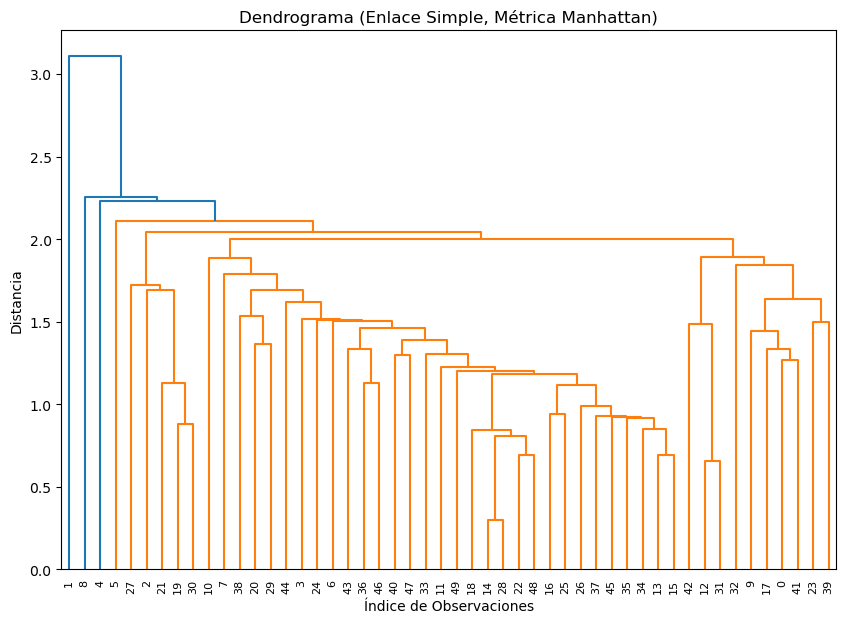

In [284]:
# Enlace Simple con Métrica Manhattan
linkage_matrix = linkage(df_usa_arrests_scaled, method="single", metric="cityblock")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Simple, Métrica Manhattan)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace completo con distancia Euclidiana

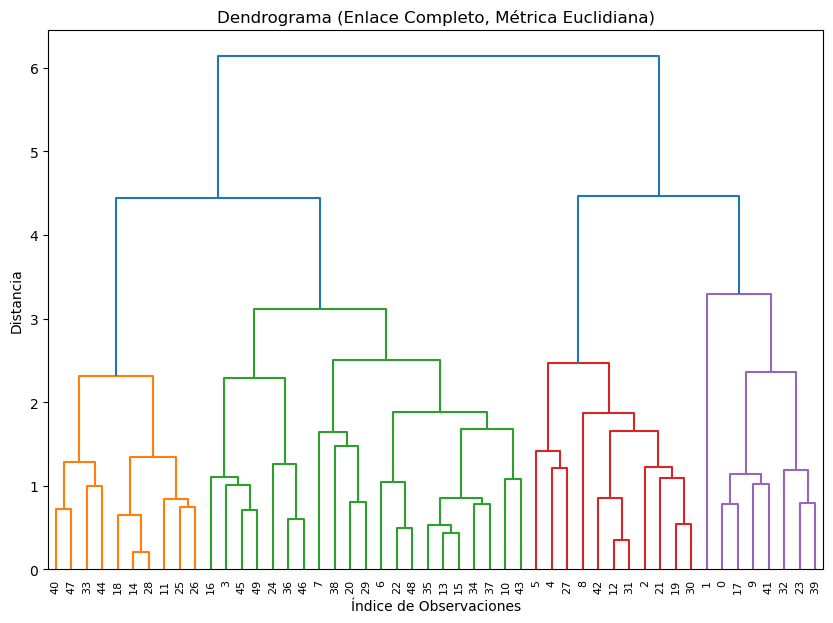

In [285]:
# Enlace Completo con Métrica Euclidiana
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="euclidean")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Completo, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace completo con distancia Manhattan

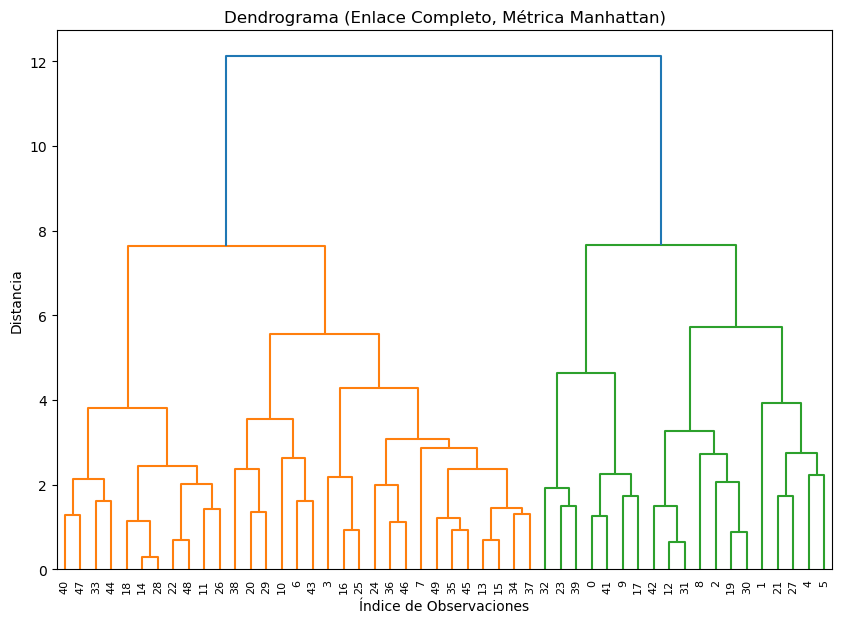

In [286]:
#Métrica Manhattan
linkage_matrix = linkage(df_usa_arrests_scaled, method="complete", metric="cityblock")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Completo, Métrica Manhattan)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


Enlace Ward con distancia Euclidiana

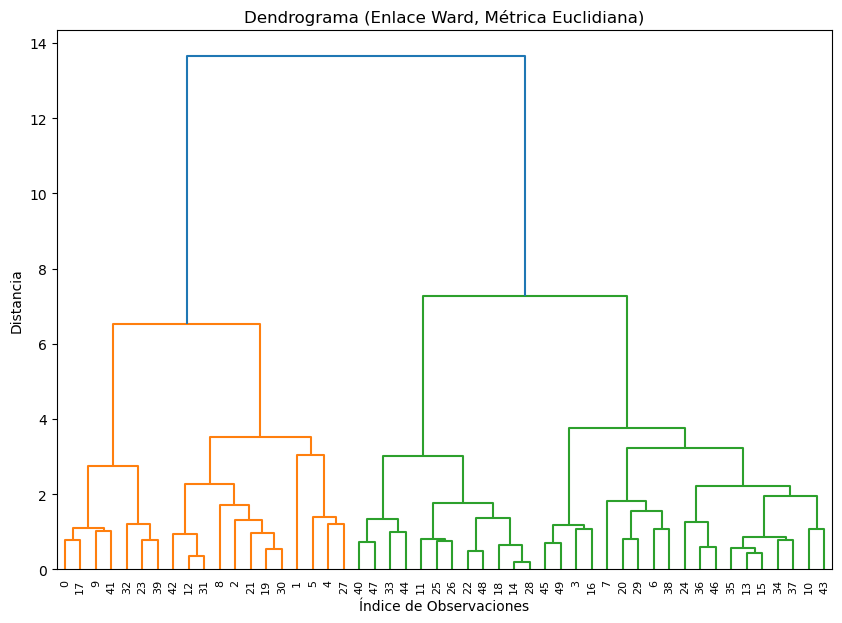

In [287]:
# Enlace Ward con Métrica Euclidiana
linkage_matrix = linkage(df_usa_arrests_scaled, method="ward", metric="euclidean")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Dendrograma (Enlace Ward, Métrica Euclidiana)")
plt.xlabel("Índice de Observaciones")
plt.ylabel("Distancia")
plt.show()


### 2.B. Escoja uno de los métodos aglomerativos (métrica y enlace), con este, crear los 3 grupos y comparar los clúster obtenidos, en términos de promedio y desviación estándar.

Usaremos el enlace ward con la métrica euclideana

In [288]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")

labels = model.fit_predict(df_usa_arrests_scaled)
print(f'Etiquetas: {labels}')

print('Cluster 01: ',df_usa_arrests_scaled[labels == 0])
print('Cluster 02: ',df_usa_arrests_scaled[labels == 1])
print('Cluster 03: ',df_usa_arrests_scaled[labels == 2])

Etiquetas: [0 0 0 1 0 0 1 1 0 0 1 2 0 1 2 1 1 0 2 0 1 0 2 0 1 2 2 0 2 1 0 0 0 2 1 1 1
 1 1 0 2 0 0 1 2 1 1 2 2 1]
Cluster 01:        Murder   Assault  UrbanPop      Rape
0   1.255179  0.790787 -0.526195 -0.003451
1   0.513019  1.118060 -1.224067  2.509424
2   0.072361  1.493817  1.009122  1.053466
4   0.281093  1.275635  1.776781  2.088814
5   0.025976  0.402909  0.869548  1.883901
8   1.765415  1.990786  1.009122  1.150530
9   2.229265  0.487757 -0.386621  0.492653
12  0.605789  0.948363  1.218484  0.298525
17  1.765415  0.948363  0.032102  0.104398
19  0.814521  1.566544  0.101889  0.708350
21  1.000062  1.021090  0.590399  1.495646
23  1.927762  1.069575 -1.503215 -0.445631
27  1.023254  0.984726  1.078909  2.671197
30  0.837714  1.384726  0.311251  1.172100
31  0.768136  1.008969  1.427845  0.525008
32  1.208794  2.015028 -1.433428 -0.553480
39  1.533490  1.311999 -1.224067  0.136752
41  1.255179  0.208970 -0.456408  0.611287
42  1.139217  0.366545  1.009122  0.460298
Cluster 02:  

In [289]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [290]:
def compare_promedios_std(df):
    clusters_index = df["cluster"].unique()
    for i in clusters_index:
        print(f'CLUSTER {i+1}')
        print('----')
        print('Promedio: ')
        print(df[df["cluster"] == i].mean())
        print('Desviación Estándar: ')
        print(df[df["cluster"] == i].std())

In [291]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 1
----
Promedio: 
Murder      1.053771
Assault     1.073403
UrbanPop    0.193714
Rape        0.861041
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.614641
Assault     0.500570
UrbanPop    1.036692
Rape        0.928914
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.365856
Assault    -0.347968
UrbanPop    0.399403
Rape       -0.220851
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.464745
Assault     0.497125
UrbanPop    0.759453
Rape        0.570458
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder     -1.089198
Assault    -1.148605
UrbanPop   -0.939102
Rape       -1.013634
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.361124
Assault     0.304152
UrbanPop    0.735228
Rape        0.339504
cluster     0.000000
dtype: float64


### 2.C. Realice un agrupamiento considerando 3 grupos utilizando la tecnica K-medias. Comparar los cluster obtenidos, en terminos de promedio y desviacion estandar

In [292]:
model = KMeans(n_clusters=3)
model.fit(df_usa_arrests_scaled)
labels = model.predict(df_usa_arrests_scaled)


In [293]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [294]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 1
----
Promedio: 
Murder      1.324757
Assault     0.909306
UrbanPop   -0.867377
Rape        0.296129
cluster     0.000000
dtype: float64
Desviación Estándar: 
Murder      0.641264
Assault     0.569528
UrbanPop    0.542193
Rape        0.914726
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder      0.655742
Assault     0.953025
UrbanPop    0.950072
Rape        1.076695
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.529620
Assault     0.621865
UrbanPop    0.512707
Rape        0.802765
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder     -0.730266
Assault    -0.734753
UrbanPop   -0.162305
Rape       -0.595078
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.510171
Assault     0.557758
UrbanPop    0.967066
Rape        0.602401
cluster     0.000000
dtype: float64


### 3. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad optima de grupos utilizando algun metodo de agrupamiento jerarquico (deben fijar una metrica y un tipo de enlace). En caso que los algoritmos entreguen diferentes valores de K seleccionar una metodologıa e interpretar los grupos obtenidos.

In [295]:
def obtener_within_cluster(observaciones, labels):
    distancias_totales_cluster = []
    for index_cluster in range(0, max(labels) + 1):
        distancias_por_cluster = pairwise_distances(
            X=observaciones[labels == index_cluster], metric="euclidean"
        )
        distancias_totales_cluster.append(distancias_por_cluster.sum())
    return sum(distancias_totales_cluster)

Usaremos el tipo de enlace ward con una métrica euclidiana

Técnica del codo

Text(0, 0.5, 'Porcentaje Within-Cluster')

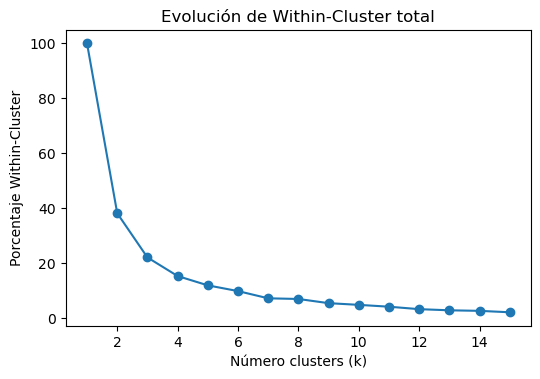

In [296]:
k_max =15
within_cluster_list = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = AgglomerativeClustering(
        n_clusters=k, metric="euclidean", linkage="ward"
    )
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_ks, within_cluster_list / within_cluster_list[0] * 100, marker="o")
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters (k)")
ax.set_ylabel("Porcentaje Within-Cluster")

Según este método el k que se puede ver cuando el porcentage de WC representa el 10% aprox del total es en un k=6

Técnica de Hartigan

[0.03244594 0.01491121 0.00926043 0.00608724 0.00464517 0.00818721
 0.00079675 0.00659591 0.00309636 0.00402638 0.00700807 0.00384677
 0.0020617 ]


Text(0, 0.5, 'H')

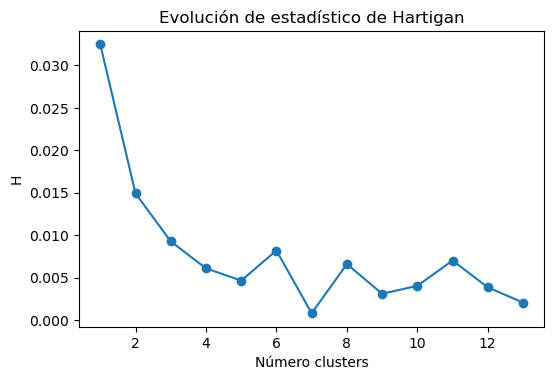

In [297]:
k=np.arange(15)
# Método Hartigan
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

En este caso es dificil determinar el k ya que no se ve un cambio brusco en la gráfica, y hay mucha fluctuación

Técnica de Silhuette

Text(0, 0.5, 'Media índices silhouette')

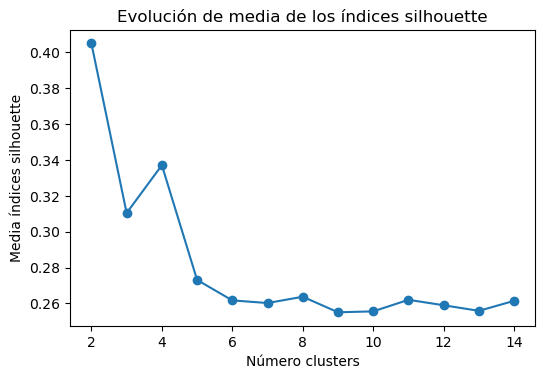

In [298]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward")
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

Para este caso usaremos un k=6

In [305]:
model = AgglomerativeClustering(
        n_clusters=6, metric="euclidean", linkage="ward"
    )
labels = model.fit_predict(df_usa_arrests_scaled)

In [306]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [307]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 4
----
Promedio: 
Murder      1.596441
Assault     0.976068
UrbanPop   -0.785405
Rape        0.048933
cluster     3.000000
dtype: float64
Desviación Estándar: 
Murder      0.392841
Assault     0.586375
UrbanPop    0.595873
Rape        0.434771
cluster     0.000000
dtype: float64
CLUSTER 2
----
Promedio: 
Murder      0.460835
Assault     0.945332
UrbanPop    0.625293
Rape        2.288334
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.424440
Assault     0.380662
UrbanPop    1.292476
Rape        0.364618
cluster     0.000000
dtype: float64
CLUSTER 6
----
Promedio: 
Murder      0.875402
Assault     1.222605
UrbanPop    0.834654
Rape        0.857990
cluster     5.000000
dtype: float64
Desviación Estándar: 
Murder      0.479801
Assault     0.493172
UrbanPop    0.456864
Rape        0.419777
cluster     0.000000
dtype: float64
CLUSTER 5
----
Promedio: 
Murder      0.153534
Assault    -0.203151
UrbanPop   -0.648323
Rape       -0.345871
cluster     4.000000
dtype

### 4. Utilice las tecnicas del codo, de Hartigan y Silhuette para seleccionar la cantidad  ́optima de grupos utilizando el algoritmo K-medias. En caso que los algoritmos entreguen diferentes valores de K, seleccionar una metodologia e interpretar los grupos obtenidos.

Técnica del codo

Text(0, 0.5, 'Porcentaje Within-Cluster')

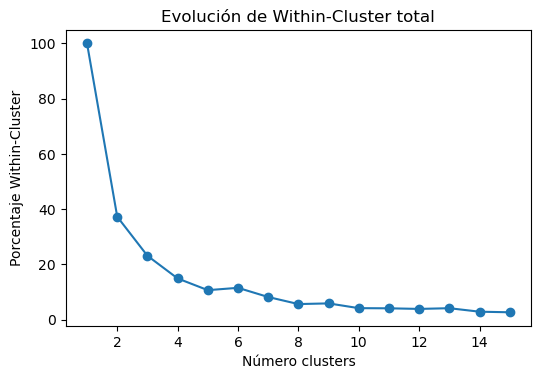

In [299]:
k_max = 15
within_cluster_list = []

for k in range(1, k_max + 1):
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    within_cluster_list.append(obtener_within_cluster(df_usa_arrests_scaled, labels))

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(
    range(1, k_max + 1), within_cluster_list / within_cluster_list[0] * 100, marker="o"
)
ax.set_title("Evolución de Within-Cluster total")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Porcentaje Within-Cluster")

Técnica de Hartigan

[ 0.0336983   0.01249625  0.01149066  0.00849011 -0.00159913  0.00906416
  0.01036896 -0.00097922  0.0099563   0.00034713  0.0014082  -0.00160301
  0.01175816]


Text(0, 0.5, 'H')

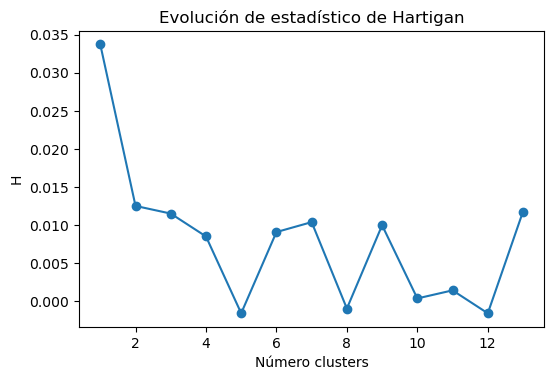

In [300]:
k = np.arange(15)
wc_array = np.array(within_cluster_list)
H = (wc_array[0:13] / wc_array[1:14] - 1) / (len(df_usa_arrests_scaled) - k[0:13])
print(H)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range(1, 14), H, marker="o")
ax.set_title("Evolución de estadístico de Hartigan")
ax.set_xlabel("Número clusters")
ax.set_ylabel("H")

Técnica de Silhuette

Text(0, 0.5, 'Media índices silhouette')

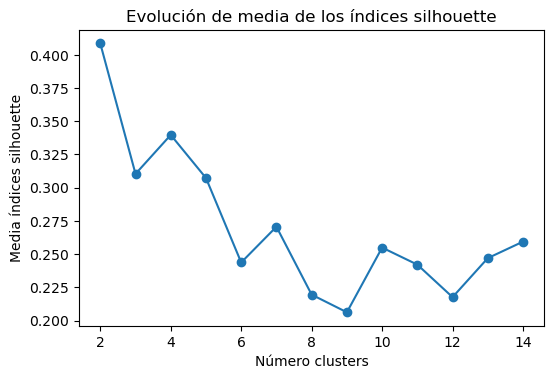

In [301]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for k in range_n_clusters:
    model = KMeans(n_clusters=k)
    labels = model.fit_predict(df_usa_arrests_scaled)
    silhouette_avg = silhouette_score(df_usa_arrests_scaled, labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel("Número clusters")
ax.set_ylabel("Media índices silhouette")

Usaremos un k=6 obtenido por la técnica del codo

In [302]:
model = KMeans(n_clusters=6)
labels = model.fit_predict(df_usa_arrests_scaled)

In [303]:
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [304]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 2
----
Promedio: 
Murder      1.596441
Assault     0.976068
UrbanPop   -0.785405
Rape        0.048933
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.392841
Assault     0.586375
UrbanPop    0.595873
Rape        0.434771
cluster     0.000000
dtype: float64
CLUSTER 4
----
Promedio: 
Murder      0.513019
Assault     1.118060
UrbanPop   -1.224067
Rape        2.509424
cluster     3.000000
dtype: float64
Desviación Estándar: 
Murder     NaN
Assault    NaN
UrbanPop   NaN
Rape       NaN
cluster    NaN
dtype: float64
CLUSTER 5
----
Promedio: 
Murder      0.717886
Assault     1.044322
UrbanPop    0.892810
Rape        1.188277
cluster     4.000000
dtype: float64
Desviación Estándar: 
Murder      0.501227
Assault     0.551056
UrbanPop    0.490169
Rape        0.725565
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder     -0.210588
Assault    -0.415272
UrbanPop   -0.344749
Rape       -0.205128
cluster     2.000000
dtype: float64
Desviación Estándar:

### 5. Buscar o implementar la tecnica de agrupamiento K-medois (PAM) y el metodo del Gap-Statistic para seleccionar la cantidad de grupos

K-medoides es un método de agrupamiento similar a K-means, pero en lugar de usar la media de los puntos en un grupo para definir su centro (centroide), usa un punto real del grupo llamado "medoide". Esto hace que K-medoides sea más robusto a los valores atípicos.

Gap Statistic:El Gap Statistic es una técnica para determinar el número óptimo de grupos (k) en un conjunto de datos
Gap Máximo: El número de grupos óptimo es el valor de k que maximiza el Gap. Este valor sugiere que hay una clara separación entre los grupos en los datos.
Evaluación de 
Estabilidad: Si el Gap no varía significativamente para diferentes valores de k, puede indicar que los datos no tienen una estructura de grupo fuerte.

Usaremos esta función para generar las muestras aleatorias

In [308]:
def generate_samples(limites,n):
    n_features = len(limites[0])
    samples = np.zeros((n, n_features))
    for i in range(n_features):
        samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
    return samples

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de clusters: 1
Número de clusters: 2
 GAPS COMPARACIÓN: 0.14121468421972416>=0.44386166221805695
Número de clusters: 3
 GAPS COMPARACIÓN: 0.47292587735267144>=0.5214464384132934
Número de clusters: 4
 GAPS COMPARACIÓN: 0.5598190004873125>=0.6506770846909533
Número de clusters: 5
 GAPS COMPARACIÓN: 0.6832668414164624>=0.7329122953319323
Número de clusters: 6
 GAPS COMPARACIÓN: 0.771260557374311>=0.7990891630178436
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8362127727992466>=0.8127305210762363
 Cluster óptimo:  6
Número de clusters: 8
 GAPS COMPARACIÓN: 0.8540307361204347>=0.8673919881006227
Número de clusters: 9
 GAPS COMPARACIÓN: 0.9029272802601929>=0.8887506196843535
 Cluster óptimo:  8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.926107087707182>=0.930505333047051


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de clusters: 11
 GAPS COMPARACIÓN: 0.9591434085109984>=0.9608923319380934
Número de clusters: 12
 GAPS COMPARACIÓN: 0.9986753576171239>=0.955640245115406
 Cluster óptimo:  11
Número de clusters: 13
 GAPS COMPARACIÓN: 0.9934435236246388>=0.9851463129247056
 Cluster óptimo:  12
Número de clusters: 14
 GAPS COMPARACIÓN: 1.0456244286043788>=1.0579299883022704
Número de clusters: 15
 GAPS COMPARACIÓN: 1.105063027686957>=1.0495115448466334
 Cluster óptimo:  14


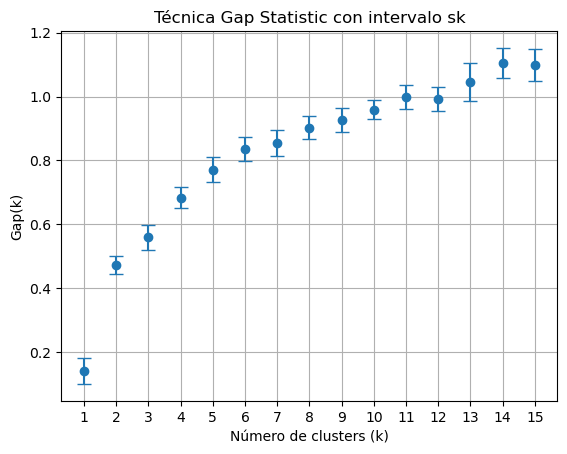

In [309]:
m_conjuntos=15
k_max=15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k=[]
gaps=[]
sks=[]
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(df_usa_arrests_scaled)
    labels = model.labels_
    wc_samples=[]
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="manhattan").fit(samples)
        labels_sample = model_sample.labels_
        within_cluster_sample=obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original=obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio=np.log(wc_samples).mean()
    gap_k=l_medio-np.log(within_cluster_original)
    sdk_cuadrado=((np.log(wc_samples)-l_medio)**2).mean()
    sk=np.sqrt(1+1/m_conjuntos)*np.sqrt(sdk_cuadrado)
    wc_por_k.append(within_cluster_original)
    gaps.append(gap_k)
    sks.append(sk)
    print(f'Número de clusters: {k}')
    if k>1:
        print(f' GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}')
        if gaps[k-2]>=gap_k-sk:
            print(' Cluster óptimo: ',k-1)
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Según la gráfica el k menor que cumple la condición es k=6

### 6. Utilizar el método Gap-Statistic para escoger la cantidad apropiada de Clúster cuando se aplica la técnica de agrupamiento K-medois (PAM). Utilice al menos dos metricas de disimilaridad diferentes. En caso que los métodos anteriores den resultados diferentes escoger uno y luego describir los grupos (promedio y desviación estándar de cada variable de cada grupo) seleccionados mediante PAM

Métrica Euclidiana

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de cluster: 1
Número de cluster: 2
 GAPS COMPARACIÓN: 0.15813432241984948>=0.442121056135817
Número de cluster: 3
 GAPS COMPARACIÓN: 0.468487425286356>=0.5345290554152821
Número de cluster: 4
 GAPS COMPARACIÓN: 0.5715579182031112>=0.6571479594257277
Número de cluster: 5
 GAPS COMPARACIÓN: 0.6998884175989941>=0.7279012195244963
Número de cluster: 6
 GAPS COMPARACIÓN: 0.7613367241613904>=0.7844592810795065


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de cluster: 7
 GAPS COMPARACIÓN: 0.8262413130793353>=0.7876006814258033
Número de clusters óptimo: 6
Número de cluster: 8
 GAPS COMPARACIÓN: 0.838401640079681>=0.8448454165474768
Número de cluster: 9
 GAPS COMPARACIÓN: 0.8890945755623259>=0.8764308229526111
Número de clusters óptimo: 8
Número de cluster: 10
 GAPS COMPARACIÓN: 0.9186416321903081>=0.876655906379909
Número de clusters óptimo: 9
Número de cluster: 11
 GAPS COMPARACIÓN: 0.9249840119365871>=0.9506041369460715
Número de cluster: 12
 GAPS COMPARACIÓN: 0.992202022329816>=1.0266092591505056
Número de cluster: 13
 GAPS COMPARACIÓN: 1.0666445600518477>=1.03543498555083
Número de clusters óptimo: 12


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de cluster: 14
 GAPS COMPARACIÓN: 1.0906246988219737>=1.053542220574851
Número de clusters óptimo: 13
Número de cluster: 15
 GAPS COMPARACIÓN: 1.1062189155613646>=1.0716331409027418
Número de clusters óptimo: 14


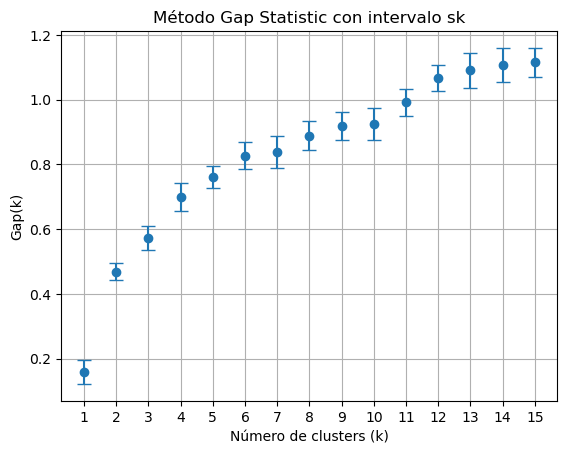

In [310]:
m_conjuntos = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks = range(1, k_max + 1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_conjuntos):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="euclidean").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_conjuntos) * np.sqrt(sdk_cuadrado)
    gaps.append(gap_k)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de cluster: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k - 2] >= gap_k - sk:
            print(f"Número de clusters óptimo: {k-1}")
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Método Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

Métrica chebyshev

La métrica de Chebyshev, también conocida como distancia de Chebyshev o distancia máxima, es una métrica que define la distancia entre dos puntos en un espacio vectorial. Es particularmente útil en situaciones donde solo importa la mayor diferencia en una sola dimensión. La distancia de Chebyshev entre dos puntos es cuántos "pasos" necesitas tomar, si te permites el lujo de moverte en cualquier dirección hasta llegar al punto más lejano.

/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/Users/marcofura/anaconda3/envs/fundamentos_matematicos/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated

Número de clusters: 1
Número de clusters: 2
 GAPS COMPARACIÓN: 0.1532122342576212>=0.42374333304163353
Número de clusters: 3
 GAPS COMPARACIÓN: 0.4561184237662381>=0.5082265604159731
Número de clusters: 4
 GAPS COMPARACIÓN: 0.5392724181259805>=0.6544615063820501
Número de clusters: 5
 GAPS COMPARACIÓN: 0.697819455014792>=0.7344245405279951
Número de clusters: 6
 GAPS COMPARACIÓN: 0.762723535830796>=0.7800583302419891
Número de clusters: 7
 GAPS COMPARACIÓN: 0.8279263943229012>=0.8288048681473373
Número de clusters: 8
 GAPS COMPARACIÓN: 0.8702339612748666>=0.853134546908507
Número de clusters óptimo: 7
Número de clusters: 9
 GAPS COMPARACIÓN: 0.8859638292450276>=0.8605958503422867
Número de clusters óptimo: 8
Número de clusters: 10
 GAPS COMPARACIÓN: 0.8969917284928082>=0.8923457353279673
Número de clusters óptimo: 9


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

Número de clusters: 11
 GAPS COMPARACIÓN: 0.9390208006301428>=0.9808295506441393
Número de clusters: 12
 GAPS COMPARACIÓN: 1.0228827844181705>=1.0240671320860788
Número de clusters: 13
 GAPS COMPARACIÓN: 1.0686186455278799>=1.030381985680077
Número de clusters óptimo: 12
Número de clusters: 14
 GAPS COMPARACIÓN: 1.077373889716771>=1.0354286234217325
Número de clusters óptimo: 13
Número de clusters: 15
 GAPS COMPARACIÓN: 1.075079830489015>=1.0815042789494032


/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  samples[:, i] = np.random.uniform(limites[0][i], limites[1][i], size=n)
/var/folders/xw/ksr09pc96kqcwxk95_zhnv080000gn/T/ipykernel_227/653806711.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consist

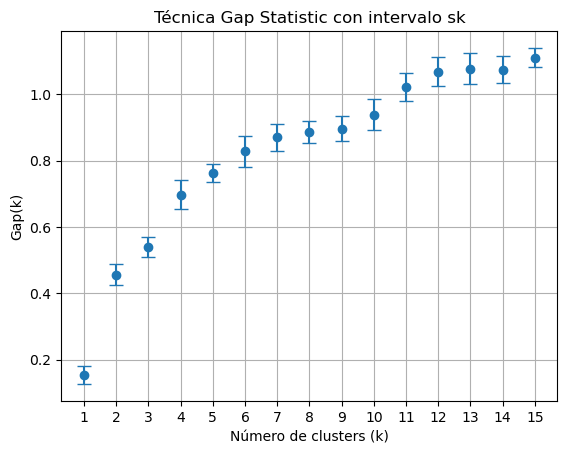

In [311]:
m_samples = 15
k_max = 15
limites = (df_usa_arrests_scaled.min(), df_usa_arrests_scaled.max())
wc_por_k = []
gaps = []
sks = []
range_ks=range(1,k_max+1)
for k in range_ks:
    model = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
        df_usa_arrests_scaled
    )
    labels = model.labels_
    wc_samples = []
    for i in range(m_samples):
        samples = generate_samples(limites, len(df_usa_arrests_scaled))
        model_sample = KMedoids(n_clusters=k, method="pam", metric="chebyshev").fit(
            samples
        )
        labels_sample = model_sample.labels_
        within_cluster_sample = obtener_within_cluster(samples, labels)
        wc_samples.append(within_cluster_sample)
    within_cluster_original = obtener_within_cluster(df_usa_arrests_scaled, labels)
    l_medio = np.log(wc_samples).mean()
    gap_k = l_medio - np.log(within_cluster_original)
    gaps.append(gap_k)
    sdk_cuadrado = ((np.log(wc_samples) - l_medio) ** 2).mean()
    sk = np.sqrt(1 + 1 / m_samples) * np.sqrt(sdk_cuadrado)
    sks.append(sk)
    wc_por_k.append(within_cluster_original)
    print(f"Número de clusters: {k}")
    if k > 1:
        print(f" GAPS COMPARACIÓN: {gaps[k-2]}>={gap_k-sk}")
        if gaps[k-2]>=gap_k-sk:
            print(f'Número de clusters óptimo: {k-1}')
plt.errorbar(range_ks, gaps, yerr=sks, fmt="o", capsize=5)
plt.title("Técnica Gap Statistic con intervalo sk")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Gap(k)")
plt.xticks(range_ks)
plt.grid(True)
plt.show()

En estos casos la primera métrica me dió como número óptimo de clusters k=6 y la segunda k=7, para continuar el análisis iremos por la primera métrica que nos dio k=6

In [312]:
model = KMedoids(n_clusters=6, method="pam", metric="euclidean").fit(
        df_usa_arrests_scaled
    )
labels = model.labels_
df_usa_arrests_clustered = df_usa_arrests_scaled.copy()
df_usa_arrests_clustered["cluster"] = labels

In [313]:
compare_promedios_std(df_usa_arrests_clustered)

CLUSTER 2
----
Promedio: 
Murder      1.426224
Assault     0.883211
UrbanPop   -0.822791
Rape        0.019467
cluster     1.000000
dtype: float64
Desviación Estándar: 
Murder      0.603380
Assault     0.603072
UrbanPop    0.561714
Rape        0.411057
cluster     0.000000
dtype: float64
CLUSTER 3
----
Promedio: 
Murder      0.782632
Assault     1.218059
UrbanPop    0.564229
Rape        1.709995
cluster     2.000000
dtype: float64
Desviación Estándar: 
Murder      0.530747
Assault     0.465580
UrbanPop    0.886628
Rape        0.695733
cluster     0.000000
dtype: float64
CLUSTER 5
----
Promedio: 
Murder      0.573319
Assault     0.781090
UrbanPop    0.995165
Rape        0.617757
cluster     4.000000
dtype: float64
Desviación Estándar: 
Murder      0.417014
Assault     0.556877
UrbanPop    0.419884
Rape        0.292845
cluster     0.000000
dtype: float64
CLUSTER 6
----
Promedio: 
Murder     -0.716185
Assault    -0.345143
UrbanPop    1.138727
Rape       -0.542695
cluster     5.000000
dtype